In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
#lectura de datos
df = pd.read_csv("parkinsons_updrs.data")
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [28]:
#Resumen de cada  variable
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
subject#,5875.0,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.0,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.0,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [29]:
#Identificar valores nulos
df.isna().mean()*100

subject#         0.0
age              0.0
sex              0.0
test_time        0.0
motor_UPDRS      0.0
total_UPDRS      0.0
Jitter(%)        0.0
Jitter(Abs)      0.0
Jitter:RAP       0.0
Jitter:PPQ5      0.0
Jitter:DDP       0.0
Shimmer          0.0
Shimmer(dB)      0.0
Shimmer:APQ3     0.0
Shimmer:APQ5     0.0
Shimmer:APQ11    0.0
Shimmer:DDA      0.0
NHR              0.0
HNR              0.0
RPDE             0.0
DFA              0.0
PPE              0.0
dtype: float64

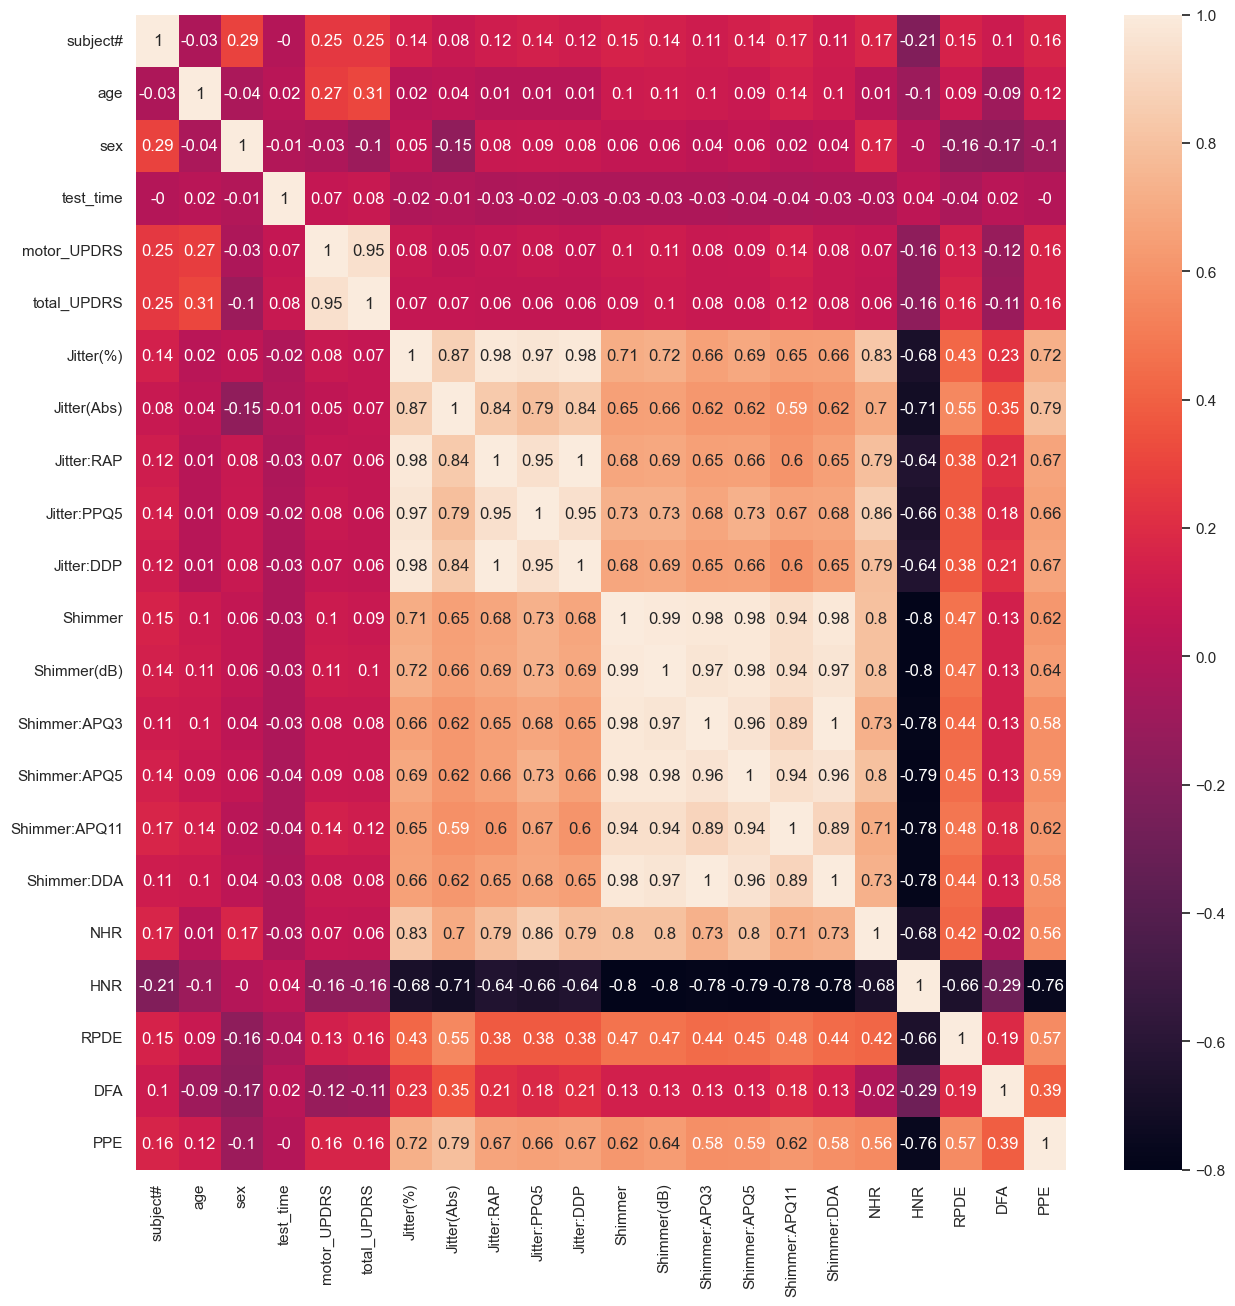

In [30]:
#Correlacion entre variables
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(round(df.corr(method='pearson', numeric_only=True),2), annot = True)
plt.show()

- Se observa alta correlación entre variables del mismo tipo (shimmer, jitter). Estas variables aportan poca información adicional y hará falta reducir la dimensionalidad mediante la selección de componentes principales.
- La UPDRS parece tener correlación débil con variables como 'PPE', 'DFA', 'RPDE', 'HNR', 'Shimmer:APQ11' y 'age'.

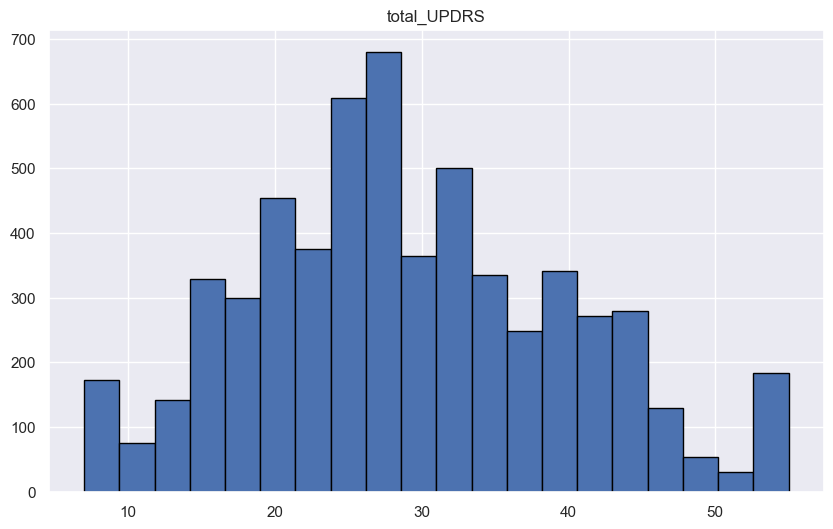

In [31]:
# Histograma para la variable 'total_UPDRS'
plt.figure(figsize=(10, 6))
df['total_UPDRS'].hist(bins=20, edgecolor='black')
plt.title('total_UPDRS')
plt.show()

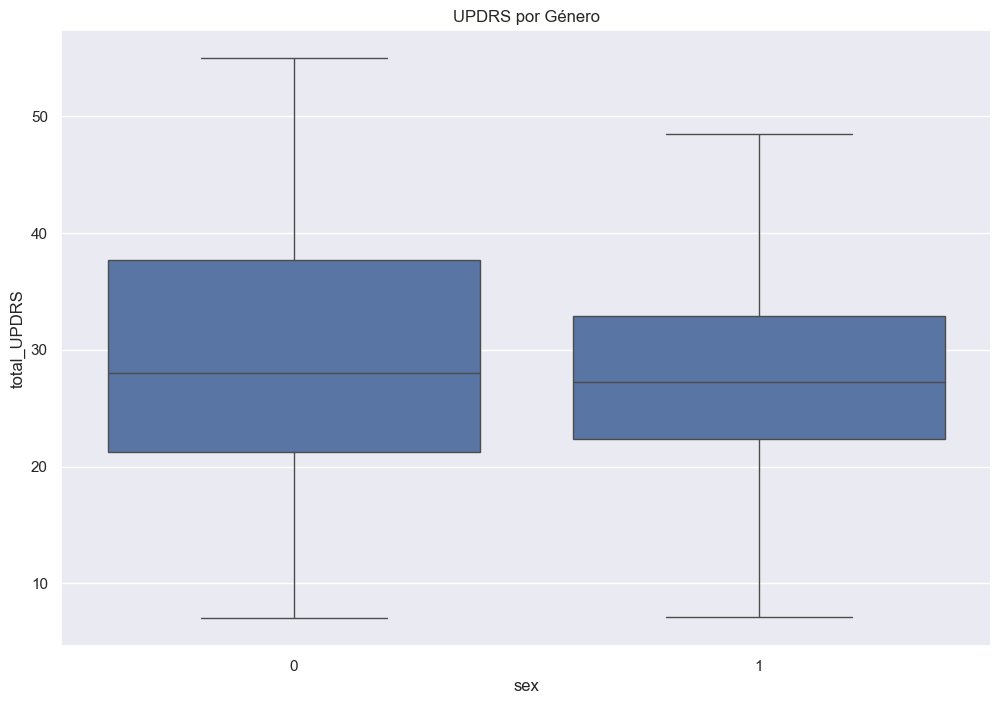

In [32]:
# Boxplots de UPDRS segun el genero
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='total_UPDRS', data=df)
plt.title('UPDRS por Género')
plt.show()

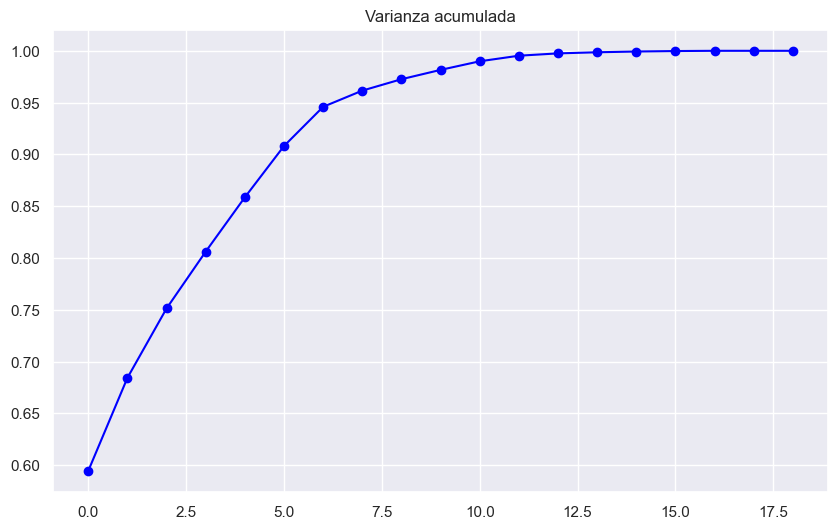

Número mínimo: 6


In [33]:
#Análisis de componentes principales

# Preprocesamiento: eliminación de filas con valores faltantes y selección de columnas numéricas
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['motor_UPDRS', 'total_UPDRS', 'sex'])
y = df['total_UPDRS']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de PCA sin limitar el número de componentes para observar toda la varianza explicada
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Cálculo de la varianza acumulada
varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)

# Determinación del número de componentes para explicar más del 90% de la varianza
num_componentes_90 = np.where(varianza_acumulada >= 0.9)[0][0] + 1

# Gráfica de la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(varianza_acumulada, marker='o', linestyle='-', color='blue')
plt.title('Varianza acumulada')
plt.show()

# Impresión de resultados
print(f"Número mínimo: {num_componentes_90}")

- Los primeros 6 componentes principales explican el 90% de la varianza.